0.0008740425109863281
1.0826470851898193
0.001718759536743164
0.8454780578613281
final Abar_min: 0.29199343129092503
6.882316827774048


<IPython.core.display.Javascript object>


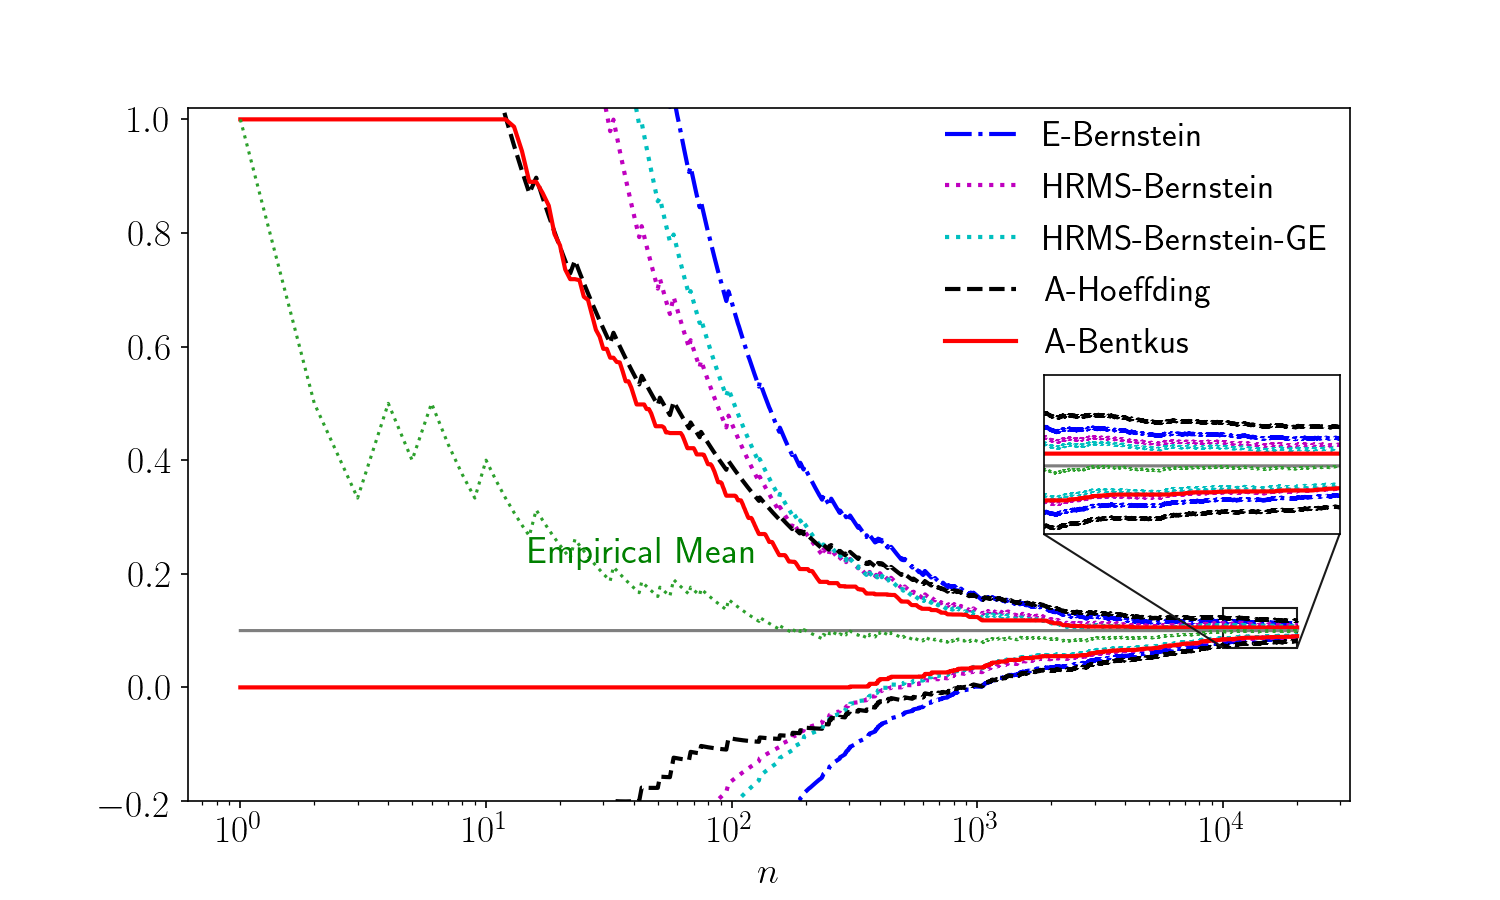

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1a1a803320>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1a1a8039e8>)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
import scipy.optimize
import scipy.special
import time

import pickle

from conc_ineq.hoeffding import adaptive_hoeffding_seq
from conc_ineq.bernstein import empirical_bernstein_seq, hrms_bernstein_seq, hrms_bernstein_gamma_seq
from conc_ineq.bentkus import adaptive_bentkus_seq


from matplotlib import rc
plt.style.use('default')
rc('text', usetex=True)



### Xi ~ Bernoulli(p)
seed = 118
np.random.seed(seed)
mu = 0.1

N = int(2e4)

Y = np.random.binomial(1, p=mu, size=(N,))
Sn = np.cumsum(Y)
ns = np.arange(1, N+1)
Ymean = Sn / ns

eta = 1.1
power = 1.1

delta = 0.05


start = time.time()
f_ah = adaptive_hoeffding_seq(N, delta / 2, upper=1, lower=0)
print(time.time() - start )

start = time.time()
f_bn = empirical_bernstein_seq(Y, delta / 2, B=1., eta=eta, power=power, std_upper_bound = 1.)
print(time.time() - start )

start = time.time()
f_ho = hrms_bernstein_seq(Y, delta / 2, std_upper_bound = 0.5)
print(time.time() - start )


start = time.time()
f_gamma = hrms_bernstein_gamma_seq(Y, delta / 2, L = 0.0, U = 1.0)
print(time.time() - start )

start = time.time()
mu_low, mu_up, Sn_low, Sn_up = adaptive_bentkus_seq(Y, delta, U=1, L=0, eta=eta, power=power)
print(time.time() - start )



idx = range(N)

fig = plt.figure(figsize=(10, 6))
plt.plot(ns[idx], Ymean[idx] + f_bn[idx] / ns[idx], 'b-.', linewidth=2)
plt.plot(ns[idx], Ymean[idx] + f_ho[idx] / ns[idx], 'm:', linewidth=2)
plt.plot(ns[idx], Ymean[idx] + f_gamma[idx] / ns[idx], 'c:', linewidth=2)
plt.plot(ns[idx], Ymean[idx] + f_ah[idx] / ns[idx], 'k--', linewidth=2)
plt.plot(ns[idx], mu_up[idx], 'r', linewidth=2)

plt.plot(ns[idx], mu + np.zeros(len(idx)), '-', color='C7')
plt.plot(ns[idx], Ymean[idx], ':', color='C2')
plt.plot(ns[idx], Ymean[idx] - f_bn[idx] / ns[idx], 'b-.', linewidth=2)
plt.plot(ns[idx], Ymean[idx] - f_ho[idx] / ns[idx], 'm:', linewidth=2)
plt.plot(ns[idx], Ymean[idx] - f_gamma[idx] / ns[idx], 'c:', linewidth=2)
plt.plot(ns[idx], Ymean[idx] - f_ah[idx] / ns[idx], 'k--', linewidth=2)
plt.plot(ns[idx], mu_low[idx], 'r', linewidth=2)

plt.xlabel(r'$n$', fontsize=18)
plt.text(15, 0.22, 'Empirical Mean', rotation=0, color='g',fontsize=18,  backgroundcolor='None')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xscale('log')
plt.ylim([-0.2, 1.02])
plt.legend(['E-Bernstein', 'HRMS-Bernstein', 'HRMS-Bernstein-GE', 'A-Hoeffding', 'A-Bentkus'], 
        fontsize=17, bbox_to_anchor=(1.01, 1.03), frameon=False, # ncol = 4,
        loc=1,          
)


from mpl_toolkits.axes_grid1.inset_locator import (
    zoomed_inset_axes,
    mark_inset,
)

ax = plt.gca()
axins = zoomed_inset_axes(ax, 4, loc=7, )

axins.plot(ns[idx], Ymean[idx] + f_ah[idx] / ns[idx], 'k--', linewidth=2)
axins.plot(ns[idx], Ymean[idx] + f_bn[idx] / ns[idx], 'b-.', linewidth=2)
axins.plot(ns[idx], Ymean[idx] + f_ho[idx] / ns[idx], 'm:', linewidth=2)
axins.plot(ns[idx], Ymean[idx] + f_gamma[idx] / ns[idx], 'c:', linewidth=2)
plt.plot(ns[idx], mu_up[idx], 'r', linewidth=2)
axins.plot(ns[idx], mu + np.zeros(len(idx)), '-', color='C7')
axins.plot(ns[idx], Ymean[idx], ':', color='C2')
axins.plot(ns[idx], Ymean[idx] - f_ah[idx] / ns[idx], 'k--', linewidth=2)
axins.plot(ns[idx], Ymean[idx] - f_bn[idx] / ns[idx], 'b-.', linewidth=2)
axins.plot(ns[idx], Ymean[idx] - f_ho[idx] / ns[idx], 'm:', linewidth=2)
axins.plot(ns[idx], Ymean[idx] - f_gamma[idx] / ns[idx], 'c:', linewidth=2)
plt.plot(ns[idx], mu_low[idx], 'r', linewidth=2)

axins.set_xticks([])
axins.set_yticks([])
axins.set_xlim(10000, N)  # apply the x-limits
axins.set_ylim(0.07, 0.14)  # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")

#plt.savefig('./figure/ci_example_20k_with_hrms_gamma.pdf', bbox_inches='tight', pad_inches=0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.0009248256683349609
1.0862257480621338
0.001756906509399414
0.7180740833282471
final Abar_min: 0.5
7.614865779876709


<IPython.core.display.Javascript object>


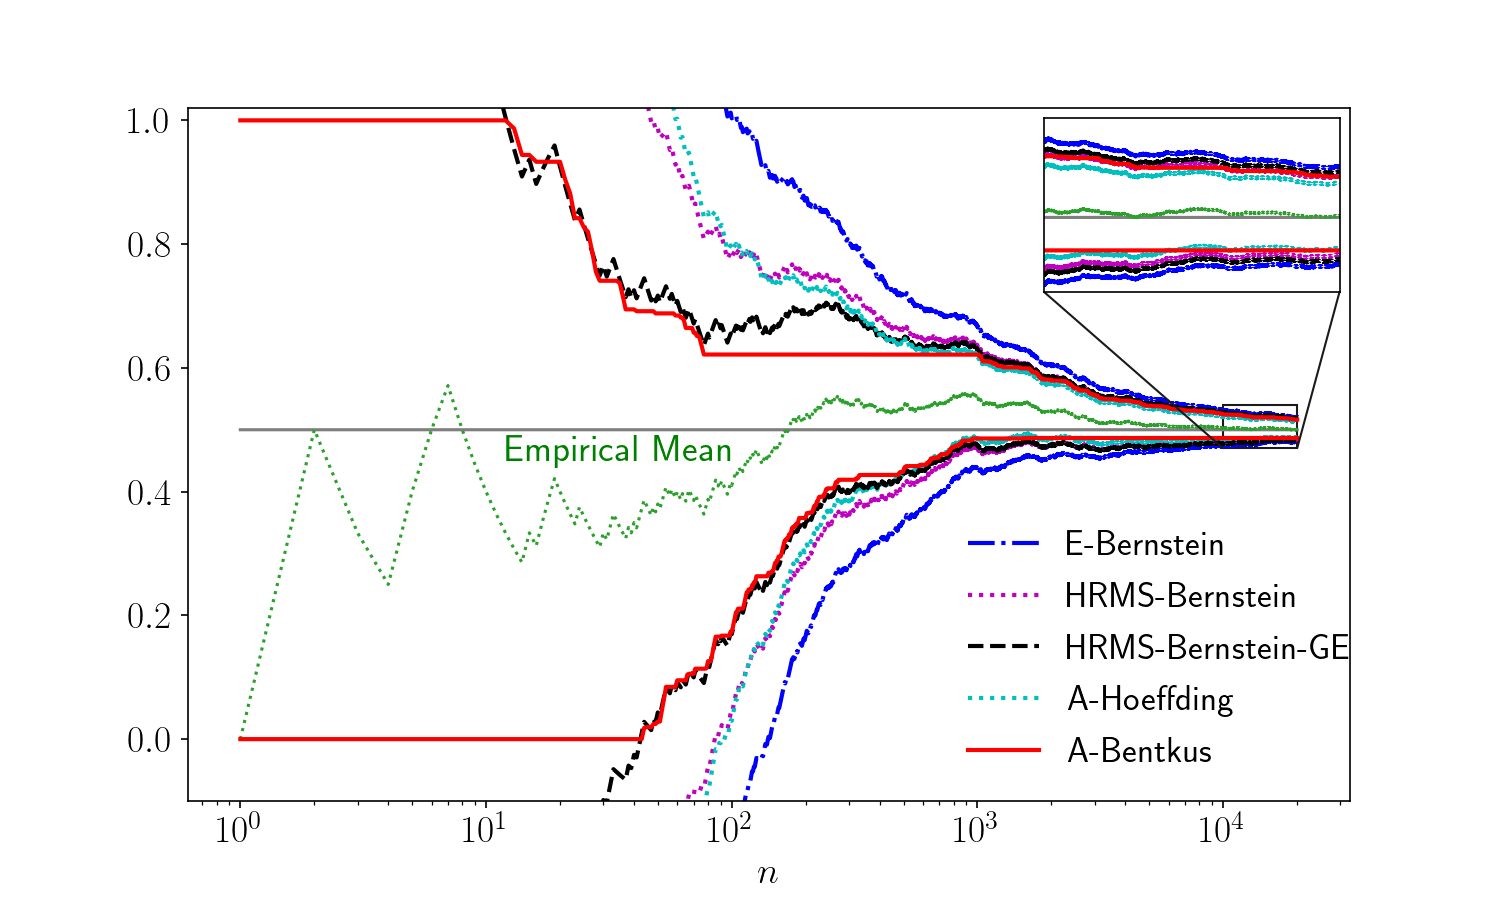

(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x1a1dd78390>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x1a1dd78cc0>)

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import math
import scipy.optimize
import scipy.special
import time

import pickle

from conc_ineq.hoeffding import adaptive_hoeffding_seq
from conc_ineq.bernstein import empirical_bernstein_seq, hrms_bernstein_seq, hrms_bernstein_gamma_seq
from conc_ineq.bentkus import adaptive_bentkus_seq


from matplotlib import rc
plt.style.use('default')
rc('text', usetex=True)



### Xi ~ Bernoulli(p)
seed = 3199
np.random.seed(seed)
mu = 0.5

N = 20000

Y = np.random.binomial(1, p=mu, size=(N,))
Sn = np.cumsum(Y)
ns = np.arange(1, N+1)
Ymean = Sn / ns

eta = 1.1
power = 1.1
delta = 0.05


start = time.time()
f_ah = adaptive_hoeffding_seq(N, delta / 2, upper=1, lower=0)
print(time.time() - start )

start = time.time()
f_bn = empirical_bernstein_seq(Y, delta / 2, B=1., eta=eta, power=power, std_upper_bound = 1.)
print(time.time() - start )

start = time.time()
f_ho = hrms_bernstein_seq(Y, delta / 2, std_upper_bound = 0.5)
print(time.time() - start )


start = time.time()
f_gamma = hrms_bernstein_gamma_seq(Y, delta / 2, L = 0.0, U = 1.0)
print(time.time() - start )

start = time.time()
mu_low, mu_up, Sn_low, Sn_up = adaptive_bentkus_seq(Y, delta, U=1, L=0, eta=eta, power=power)
print(time.time() - start )



idx = range(N)

fig = plt.figure(figsize=(10, 6))
plt.plot(ns[idx], Ymean[idx] + f_bn[idx] / ns[idx], 'b-.', linewidth=2)
plt.plot(ns[idx], Ymean[idx] + f_ho[idx] / ns[idx], 'm:', linewidth=2)
plt.plot(ns[idx], Ymean[idx] + f_ah[idx] / ns[idx], 'k--', linewidth=2)
plt.plot(ns[idx], Ymean[idx] + f_gamma[idx] / ns[idx], 'c:', linewidth=2)
plt.plot(ns[idx], mu_up[idx], 'r', linewidth=2)
plt.plot(ns[idx], mu + np.zeros(len(idx)), '-', color='C7')
plt.plot(ns[idx], Ymean[idx], ':', color='C2')
plt.plot(ns[idx], Ymean[idx] - f_bn[idx] / ns[idx], 'b-.', linewidth=2)
plt.plot(ns[idx], Ymean[idx] - f_ho[idx] / ns[idx], 'm:', linewidth=2)
plt.plot(ns[idx], Ymean[idx] - f_gamma[idx] / ns[idx], 'c:', linewidth=2)
plt.plot(ns[idx], Ymean[idx] - f_ah[idx] / ns[idx], 'k--', linewidth=2)
plt.plot(ns[idx], mu_low[idx], 'r', linewidth=2)

plt.xlabel(r'$n$', fontsize=18)
plt.text(12, 0.45, 'Empirical Mean', rotation=0, color='g',fontsize=18,  backgroundcolor='None')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.xscale('log')
plt.ylim([-0.1, 1.02])
plt.legend(['E-Bernstein', 'HRMS-Bernstein', 'HRMS-Bernstein-GE', 'A-Hoeffding', 'A-Bentkus'], 
        fontsize=17, frameon=False, loc='lower right',  bbox_to_anchor=[1.03, 0.0]        
)


from mpl_toolkits.axes_grid1.inset_locator import (
    zoomed_inset_axes,
    mark_inset,
)

ax = plt.gca()
axins = zoomed_inset_axes(ax, 4, loc='upper right', )

axins.plot(ns[idx], Ymean[idx] + f_ah[idx] / ns[idx], 'k--', linewidth=2)
axins.plot(ns[idx], Ymean[idx] + f_bn[idx] / ns[idx], 'b-.', linewidth=2)
axins.plot(ns[idx], Ymean[idx] + f_ho[idx] / ns[idx], 'm:', linewidth=2)
axins.plot(ns[idx], Ymean[idx] + f_gamma[idx] / ns[idx], 'c:', linewidth=2)
plt.plot(ns[idx], mu_up[idx], 'r', linewidth=2)
axins.plot(ns[idx], mu + np.zeros(len(idx)), '-', color='C7')
axins.plot(ns[idx], Ymean[idx], ':', color='C2')
axins.plot(ns[idx], Ymean[idx] - f_ah[idx] / ns[idx], 'k--', linewidth=2)
axins.plot(ns[idx], Ymean[idx] - f_bn[idx] / ns[idx], 'b-.', linewidth=2)
axins.plot(ns[idx], Ymean[idx] - f_ho[idx] / ns[idx], 'm:', linewidth=2)
axins.plot(ns[idx], Ymean[idx] - f_gamma[idx] / ns[idx], 'c:', linewidth=2)
plt.plot(ns[idx], mu_low[idx], 'r', linewidth=2)

axins.set_xticks([])
axins.set_yticks([])
axins.set_xlim(10000, N)  # apply the x-limits
axins.set_ylim(0.47, 0.54)  # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.1")

# plt.savefig('./figure/ci_example_20k_phalf.pdf', bbox_inches='tight', pad_inches=0)